$$ \text{Kotwal Group} $$

# Introduction

In this algorithm, we are trying to divide the modelled-transverse section of the HL-LHC collider at CERN into 128 wedges with functional boundaries. The boundaries of each wedge represents the path of a particle of charge $\pm e$ that moves in a circular path under the effect of magnetic Lorentz force. The equation for radius of such circular path of any ultra-relativistic charge particle in magnetic field is given by:
$$ r = \frac{p}{0.3Bn} $$

Here,

1. r is the radius of the circular path in meters

2. p is the momentum of the charged particle in GeV/c

3. B is the uniform magnetic field around the detector in Tesla

4. n is the integer multiple of the fundamental unit of charge e such that q = ne (Quantization of charge)

Depending on the sign of the charge, the particle will deviate in two opposite direction under the action of the magnetic Lorentz force. These two deviations form two circular arcs in opposite directions that forms the boundaries for a single wedge. Hence, we will find 256 circular path boundaries that represents 128 wedges to appropriately generate the transverse partitions. 

# Design and Construction

The transverse section of a particle accelerator with 5 cylindrical detectors looks like 5 concentric circles with their centers through the longitudinal axis of the detector. We are defining coordinate axes such that the center of these concentric circles lie at (0,0) and each circle has a radius of 5, 10, 15, 20, and 25 cm respectively. To create our wedge partitions, we divide the innner-most circle into 128 sectors such that the points where the radial line drawn through the boundary of the sectors intersects the circumference at 128 points. We use these 128 circumferential points as a basis to draw the boundaries of our wedges.


There are three fundamental rules for this construction:

1. Each circular wedge boundary originates at the center (0,0).

2. Each circular wedge boundary moves in two outward flanking directions (like an outward curving 'v') determined heuristically by the sign of the charge and constitues a complete wedge shaped like 'v'.

3. Each circular wedge boundary passes through a circumferential point and only one circumenferential point.

It is to be noted that the longitudinal axis through (0,0) along the z-cylindrical co-ordinate represents the axis of p-p collision in the particle accelerator.


## Calculation of the radius of each circular wedge boundary

We use the magnetic field to be 2 Tesla and the momentum to be 10 GeV/c (because we are interested in high momentum particle detection > 10 GeV/c) and equation above to calculate the radius of the each circle whose "part" of the circumference represents the wedge boundary. 

In [6]:
import math

B = 2  # Tesla
Z = 1
p = 10  # GeV/c

# Calculate the radius
r = p / (0.3 * B * Z)

# Round off to two decimal places
r = round(r, 2)

# Print the result
print("The radius of the circle traced by the wedge boundary is:", r, "meters")

The radius of the circle traced by the wedge boundary is: 16.67 meters


This radius 'r' = 1667 cm will be use to calculate the centers of the 256 circles which represents the wedge boundaries.

## Calculation of the circumferential points of the innermost detector circle

To find the circumferential points, the innermost detector circle (r=5cm) is divided into 128 sectors. The points where the boundary of the sector intersects the circumference are our required points. To find these points, we take any arbitrary point on the circumference of a the circle and draw a radial line. Then we resolve this radial line into its cosine and sine components by taking an increment angle of 360/128. Finally, we add the components respectively to the center to find the new co-ordinate points. We do this in a loop 128 times to find 128 circumferential points. To check that the number of points generated is correct, we print the length of the `circumferential_point` array. To visualize the innermost detector circle, the required circumferential points, and the sectors, we plot them using matplotlib.

Total number of circumferential points: 7


<Figure size 500x500 with 0 Axes>

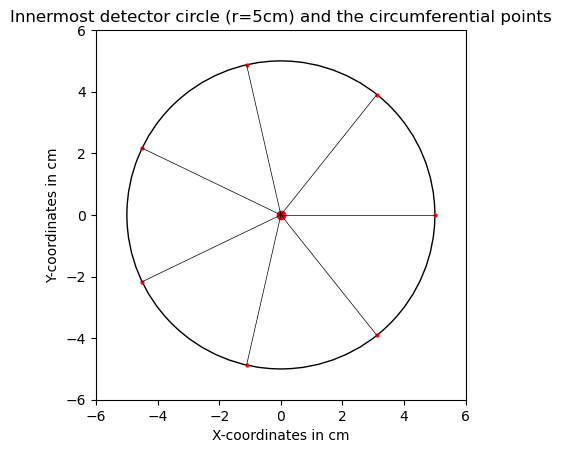

In [7]:
import matplotlib.pyplot as plt

radius = 5  # Radius in cm
detector_center = (0, 0)  # Center coordinates

#Number of wedges
N_wedges = 7

# Generate the circumferential points
circumferential_points = []
angle_increment = 360 / N_wedges  # Angle increment in degrees

for i in range(N_wedges):
    angle = math.radians(i * angle_increment)
    x = detector_center[0] + radius * math.cos(angle)
    y = detector_center[1] + radius * math.sin(angle)
    circumferential_points.append((x, y))

# Print the total number of circumferential points
print("Total number of circumferential points:", len(circumferential_points))

# Plot the circle, center, and the circumferential points
plt.figure(figsize=(5, 5))
fig, ax = plt.subplots()
ax.set_aspect('equal')

# Plot the circle
circle = plt.Circle(detector_center, radius, fill=False)
ax.add_patch(circle)

# Plot the center point
ax.plot(detector_center[0], detector_center[1], 'ro')

# Plot the circumferential points
x_values = [point[0] for point in circumferential_points]
y_values = [point[1] for point in circumferential_points]
ax.plot(x_values, y_values, 'ro', markersize=2)  # Decreased marker size

# Plot the radial lines
for point in circumferential_points:
    ax.plot([detector_center[0], point[0]], [detector_center[1], point[1]], 'k-', linewidth=0.5)

# Set axis limits
ax.set_xlim([-radius - 1, radius + 1])
ax.set_ylim([-radius - 1, radius + 1])

# Add labels and titles
plt.xlabel("X-coordinates in cm")
plt.ylabel("Y-coordinates in cm")
plt.title("Innermost detector circle (r=5cm) and the circumferential points")


# Display the plot
plt.show()

# Algorithm to Generate and Characterize Circular Wedge Boundaries

### Using NumPy and Perpendicular Bisector method to obtain the centers of the circular wedge boundaries

Here, we use the geometric property that the perpendicular bisector of the chord of a circle passes through the center of the circle. To find the perpendicular bisector, we apply the following steps:

1. Using (0,0) and one of the `circumferential_points`, we obtain the direction vector of the line segment joining these two points.

2. We then find the mid point between these two points using the mid-point formula.

3. Now, we use the dot product property that the product of two orthogonal vectors is zero and obtain the direction vector of the perpendicular bisector. In general, for a vector (x,y), its perpendicular direction vector is (-y,x). We use the same logic.

4. Then, we use the Pythagorean theorem and find the distance between the center of the circle forming the wedge boundary and the mid-point.

5. Finally, we add the found distance to the mid-point along the normalized perpendicular direction vector to find co-ordinates of one of the centers and subtract (representing the anti-parallel perpendicular direction vector) to find the other.

We repeat this process in a loop for all the 128 circumferential points and obtain the 256 circles and their centers that form the wedge boundaries.

### Test of NumPy Bisector Method

We perform the same test as we did with SymPy above for a circle of radius 1 passing through (0,1) and (1,0) and plot the output.

<Figure size 500x500 with 0 Axes>

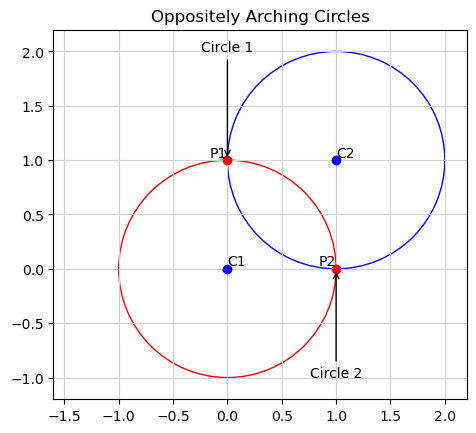

In [30]:
import numpy as np

# Given points
point1 = np.array([0, 1])
point2 = np.array([1, 0])

# Define the radius of the circles
radius = rParticleCurv = 1 #cm

# Calculate midpoint
midpoint = (point1 + point2) / 2

# Calculate direction vector perpendicular to the line segment
direction_vector = np.array([-point1[1] + point2[1], point1[0] - point2[0]])

# Normalize the direction vector
direction_vector = direction_vector / np.linalg.norm(direction_vector)

# Calculate the distance between the midpoint and the centers of the circles
distance = np.sqrt(rParticleCurv**2 - (np.linalg.norm(point1 - point2) / 2) ** 2)

# Calculate the centers of the circles
center1 = midpoint + distance * direction_vector
center2 = midpoint - distance * direction_vector

# Plotting
plt.figure(figsize=(5, 5))
circle1 = plt.Circle(center1, 1, fill=False, color='red')
circle2 = plt.Circle(center2, 1, fill=False, color='blue')

fig, ax = plt.subplots()
ax.set_aspect('equal', adjustable='box')
ax.add_artist(circle1)
ax.add_artist(circle2)

# Plotting the given points
ax.plot(point1[0], point1[1], 'ro')
ax.plot(point2[0], point2[1], 'ro')

# Plotting the centers
ax.plot(center1[0], center1[1], 'bo')
ax.plot(center2[0], center2[1], 'bo')

# Setting the x and y axis limits
ax.set_xlim([-1.6, 2.2])
ax.set_ylim([-1.2, 2.2])

# Labeling the points and centers
ax.text(point1[0], point1[1], 'P1', ha='right', va='bottom')
ax.text(point2[0], point2[1], 'P2', ha='right', va='bottom')
ax.text(center1[0], center1[1], 'C1', ha='left', va='bottom')
ax.text(center2[0], center2[1], 'C2', ha='left', va='bottom')

# Labeling the circles
ax.annotate('Circle 1', xy=(center1[0], center1[1] + 1), xytext=(center1[0], center1[1] + 2), ha='center', arrowprops=dict(arrowstyle='->'))
ax.annotate('Circle 2', xy=(center2[0], center2[1] - 1), xytext=(center2[0], center2[1] - 2), ha='center', arrowprops=dict(arrowstyle='->'))

# Title and grid
ax.set_title('Oppositely Arching Circles')
ax.grid(True, color = 'lightgray')

# Show the plot
plt.show()

### Use of the Perpendicular Bisector Method to find all the centers of the circular wedge boundaries

Now, we apply, in loop, the same method described in the test above to find all the `wedge_centers` of the circles passing through (0,0) and the `circumferential_points` found above.

In [31]:
# Given circumferential points for the construction
points = circumferential_points #Here remove the hashtag and set the number of the wedge boundaries that you need to observe

# Define the radius of the circular wedge boundaries
wedge_radius = rParticleCurv = 1667  # cm, redefining this out of the test

# Initialize arrays to store circular wedge boundaries centers
wedge_centers = []

# Loop through each circumferential point
for point in points:
    # Given point
    point1 = np.array([0, 0])
    point2 = point

    # Calculate midpoint
    midpoint = (point1 + point2) / 2

    # Calculate direction vector perpendicular to the line segment
    direction_vector = np.array([point2[1] - point1[1], point1[0] - point2[0]])

    # Normalize the direction vector
    direction_vector = direction_vector / np.linalg.norm(direction_vector)

    # Calculate the distance between the midpoint and the centers of the circles
    distance = np.sqrt(rParticleCurv ** 2 - (np.linalg.norm(point1 - point2) / 2) ** 2)

    # Calculate the centers of the circles
    center1 = midpoint + distance * direction_vector
    center2 = midpoint - distance * direction_vector
    
     #Round the decimals
    center1 = np.around(center1, decimals=100)
    centers2 = np.around(center2, decimals=100)

    # Append the centers to the array
    wedge_centers.append(center1)
    wedge_centers.append(center2)
    
# Convert centers to NumPy array
wedge_centers = np.array(wedge_centers)

#### Printing the centers of the circular wedge boundaries

In [32]:
# SIMPLE Print the coordinates of the centers
#for i, wedge_center in enumerate(wedge_centers):
    #print(f"Center {i+1}: {wedge_center}")
    
#BETTER print function
import pandas as pd

# Create a DataFrame to store the center coordinates
center_df = pd.DataFrame(wedge_centers, columns=['X-coordinate', 'Y-coordinate'])

# Add a column for the center number
center_df.insert(0, 'Center', range(1, len(center_df) + 1))

# Display the DataFrame
print(center_df)

    Center  X-coordinate  Y-coordinate
0        1      2.500000  -1666.998125
1        2      2.500000   1666.998125
2        3   1304.870340  -1037.401752
3        4  -1301.752891   1041.310910
4        5   1624.646700    373.379300
5        6  -1625.759304   -368.504660
6        7    721.030958   1502.998123
7        8   -725.535802  -1500.828704
8        9   -725.535802   1500.828704
9       10    721.030958  -1502.998123
10      11  -1625.759304    368.504660
11      12   1624.646700   -373.379300
12      13  -1301.752891  -1041.310910
13      14   1304.870340   1037.401752


$\textbf{To print all the points above, just comment the pandas print function and run the previous 'simple' print function that is just above.} $

# Visualization and Analysis

## Plotting the centers of the circular wedge boundaries

Here, we just plot the centers found above in a cartesian co-ordinate system. We draw a circle of radius 1667cm, centered at (0,0), and clearly observe the rotational symmetry of the `wedge_centers`.

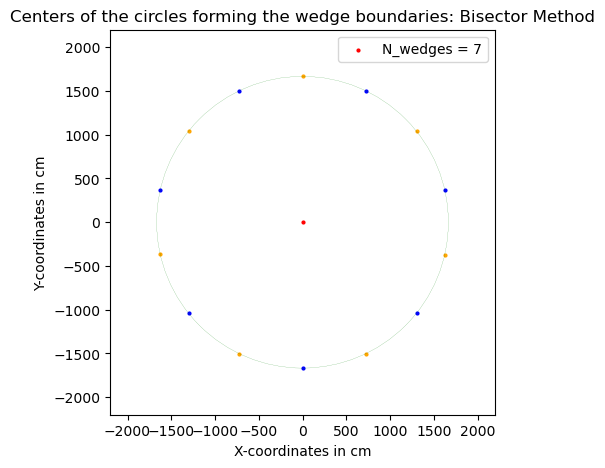

In [33]:
# Plot functions for the centers
plt.figure(figsize=(5, 5))

# Plotting (0, 0) point in red
plt.scatter(0, 0, color='red', s=4)

# Plotting centers of the circles
for i, center in enumerate(wedge_centers):
    if i % 2 == 0:
        plt.scatter(center[0], center[1], color='blue', s=4)
    else:
        plt.scatter(center[0], center[1], color='orange', s=4)

# Add labels and legend
plt.xlabel('X-coordinates in cm')
plt.ylabel('Y-coordinates in cm')
plt.title('Centers of the circles forming the wedge boundaries: Bisector Method')

# Set aspect ratio to 1:1
plt.gca().set_aspect('equal')

# Set the axes limits
plt.xlim(-2200, 2200)
plt.ylim(-2200, 2200)

# Add the circle
circle = plt.Circle((0, 0), rParticleCurv, edgecolor='green', linewidth = 0.1, facecolor='none')
plt.gca().add_patch(circle)

# Adding the legend
plt.legend([f'N_wedges = {N_wedges}'], loc="upper right")

# Show the plot
plt.show()

## Wedge Boundary Plots

### Plotting the circular wedge boundary arcs

Now, we take the `wedge_centers` and plot all the circles around it. By construction, the radius of these circles is predefined as 1667 cm.

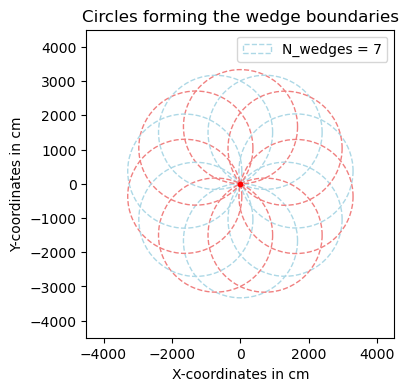

In [34]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Arc

# Plot function for the semicircular wedge boundaries
plt.figure(figsize=(4, 4))

# Plotting non-varying circles
for i, center in enumerate(wedge_centers):
    color = 'lightblue' if i % 2 == 0 else 'lightcoral'
    arc = Arc((center[0], center[1]), rParticleCurv*2, rParticleCurv*2, angle=0, theta1=0, theta2=360, color=color, linestyle='--', fill=False)
    plt.gca().add_patch(arc)

# Add labels and legend
plt.xlabel('X-coordinates in cm')
plt.ylabel('Y-coordinates in cm')
plt.title('Circles forming the wedge boundaries')

# Set the axes limits
plt.xlim(-4500, 4500)
plt.ylim(-4500, 4500)

# Set aspect ratio to 1:1
plt.gca().set_aspect('equal')

# Plotting the origin (0, 0) point as a red dot
plt.scatter(0, 0, color='red', marker='o', s=10)

# Adding the legend
plt.legend([f'N_wedges = {N_wedges}'], loc="upper right")

# Show the plot
plt.show()

### Plotting the semi-circular wedge boundary arcs

As we can see that plotting entire circles that form the wedge boundaries creates dual overlapping on the opposite symmetric ends, resulting in sth like 14 wedges in the transverse section (hereafter referred as T.S.) for just 7 `circumferential_points` or `N_wedges=7`. We don't want that in our partition. So, we draw semi-circular arcs to ensure that only single intersection in T.S. occurs and we get 'n' no. of wedges for `N_wedges = n`.

To draw these semi-circles, we try to trace the locus of the points centered at `wedge_centers` and starting to trace from the origin (0,0). By construction, as all these circles pass through (0,0), the radius of 1667 cm is automatically incorporated in this kind of tracing. It is important to note that the range for `np.arctan2()` is from `[-pi to pi]` so, we have to careful while defining the range of tracing angle.

Also, to distinguish between oppositely flanking wedge boundaries, we use two different colors for alternate circles.

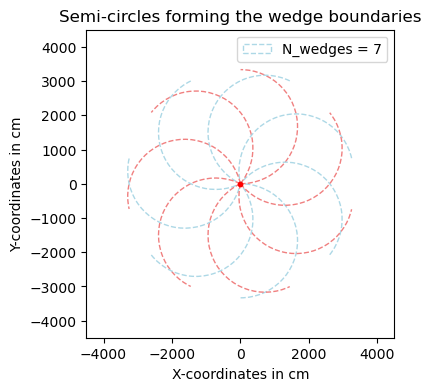

In [22]:
# Define colors for arcs
colors = ['lightblue', 'lightcoral']

# Plot function for the semicircular wedge boundaries
plt.figure(figsize=(4, 4))

# Plotting varying circles
for i, center in enumerate(wedge_centers):
    if i % 2 == 0:
        # Counterclockwise arc
        angle = np.arctan2(center[1], center[0])
        theta1 = np.degrees(angle)
        theta2 = theta1 - 180
    else:
        # Clockwise arc
        angle = np.arctan2(-center[1], -center[0])
        theta1 = np.degrees(angle)
        theta2 = theta1 + 180
    
    color = colors[i % 2]  # Alternate between lightblue and lightcoral
    
    arc = Arc(center, rParticleCurv*2, rParticleCurv*2, angle=0, theta1=theta1, theta2=theta2, color=color, linestyle='--', fill=False)
    plt.gca().add_patch(arc)

# Add labels and legend
plt.xlabel('X-coordinates in cm')
plt.ylabel('Y-coordinates in cm')
plt.title('Semi-circles forming the wedge boundaries')

# Set the axes limits
plt.xlim(-4500, 4500)
plt.ylim(-4500, 4500)

# Set aspect ratio to 1:1
plt.gca().set_aspect('equal')

# Plotting the origin (0, 0) point as a red dot
plt.scatter(0, 0, color='red', marker='o', s=10)

# Adding the legend
plt.legend([f'N_wedges = {N_wedges}'], loc="upper right")

# Show the plot
plt.show()

### Plotting the quarter-circular wedge boundary arcs

To further clarify and visualize, we also tweak the code to obtain quarter circles and see the plot. Note again, `np.arctan2()` has to be handled carefully.

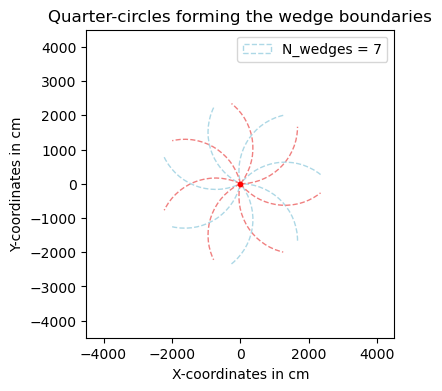

<Figure size 640x480 with 0 Axes>

In [35]:
# Define colors for arcs
colors = ['lightblue', 'lightcoral']

# Plot function for the quarter-circular wedge boundaries
plt.figure(figsize=(4, 4))

# Plotting varying circles
for i, center in enumerate(wedge_centers):
    if i % 2 == 0:
        # Clockwise arc
        angle = np.arctan2(center[1], center[0])
        theta1 = np.degrees(angle) + 90
        theta2 = theta1 + 90
    else:
        # Anti-Clockwise arc
        angle = np.arctan2(-center[1], -center[0])
        theta1 = np.degrees(angle)
        theta2 = theta1 + 90
    
    color = colors[i % 2]  # Alternate between lightblue and lightcoral
    
    arc = Arc(center, r*2, r*2, angle=0, theta1=theta1, theta2=theta2, color=color, linestyle='--', fill=False)
    plt.gca().add_patch(arc)

# Add labels and legend
plt.xlabel('X-coordinates in cm')
plt.ylabel('Y-coordinates in cm')
plt.title('Quarter-circles forming the wedge boundaries')

# Set the axes limits
plt.xlim(-4500, 4500)
plt.ylim(-4500, 4500)

# Set aspect ratio to 1:1
plt.gca().set_aspect('equal')

# Plotting the origin (0, 0) point as a red dot
plt.scatter(0, 0, color='red', marker='o', s=10)

# Adding the legend
plt.legend([f'N_wedges = {N_wedges}'], loc="upper right")

# Show the plot
plt.show()

plt.savefig("Plot_1.png", dpi=500)

## Transverse Section (T.S.) of Concentric Detector Circles and Generated Wedges

In this section, we are zooming into the 5 detectors of radius 5,10,15,20, and 25 cm and looking at the wedges we have generated. This is ultimately what will be necessary for accuracy and functionality of the particle detection process.

### Plotting the concentric detector circles and the circular wedge boundaries

For this plot, we just `plt.Circle` function of `matplotlib` library to plot the T.S. of the five detectors of given radii. We also plot the circular wedges that were obtained in the section above. This plot is for the `circular wedge boundaries`.

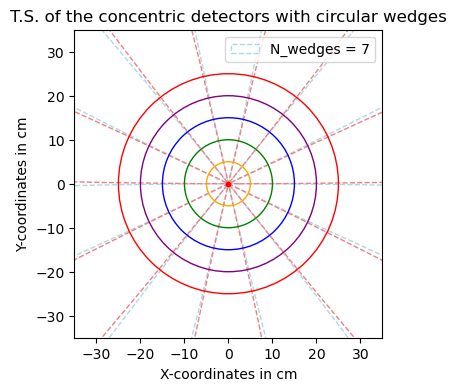

In [38]:
plt.figure(figsize=(4, 4))

# Plotting circles
for i, center in enumerate(wedge_centers):
    color = 'lightblue' if i % 2 == 0 else 'lightcoral'
    circle = plt.Circle((center[0], center[1]), r, color=color, linestyle='--', fill=False)
    plt.gca().add_patch(circle)

# Plotting additional circles with different colors
radii = [5, 10, 15, 20, 25]
colors = ['orange', 'green', 'blue', 'purple', 'red']
for radius, color in zip(radii, colors):
    circle = plt.Circle((0, 0), radius, color=color, linestyle='-', fill=False)
    plt.gca().add_patch(circle)

# Add labels and legend
plt.xlabel('X-coordinates in cm')
plt.ylabel('Y-coordinates in cm')
plt.title('T.S. of the concentric detectors with circular wedges')

# Set the axes limits
plt.xlim(-35, 35)
plt.ylim(-35, 35)

# Set aspect ratio to 1:1
plt.gca().set_aspect('equal')

# Plotting the origin (0, 0) point as a red dot
plt.scatter(0, 0, color='red', marker='o', s=10)

# Adding the legend
plt.legend([f'N_wedges = {N_wedges}'], loc="upper right")

# Show the plot
plt.show()

### Plotting the concentric detector circles and the semi-circular wedge boundaries

This is for `semi-circular wedge boundaries`.

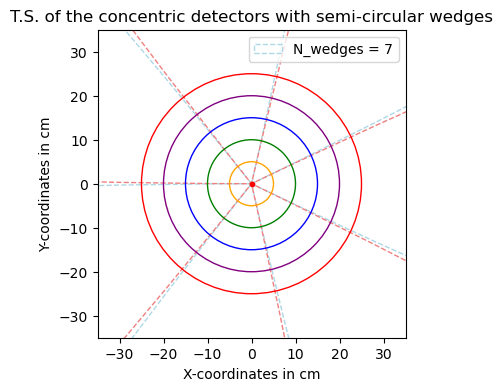

<Figure size 640x480 with 0 Axes>

In [39]:
# Plot function for the semicircular wedge boundaries
plt.figure(figsize=(4, 4))

# Define colors for arcs
colors = ['lightblue', 'lightcoral']

# Plotting varying circles
for i, center in enumerate(wedge_centers):
    if i % 2 == 0:
        # Clockwise arc
        angle = np.arctan2(-center[1], -center[0])
        theta1 = np.degrees(angle)
        theta2 = theta1 + 180
    else:
        # Counterclockwise arc
        angle = np.arctan2(center[1], center[0])
        theta1 = np.degrees(angle)
        theta2 = theta1 - 180
    
    color = colors[i % 2]  # Alternate between lightblue and lightcoral
    
    arc = Arc(center, r*2, r*2, angle=0, theta1=theta1, theta2=theta2, color=color, linestyle='--', fill=False)
    plt.gca().add_patch(arc)

# Plotting additional circles with different colors
radii = [5, 10, 15, 20, 25]
colors = ['orange', 'green', 'blue', 'purple', 'red']
for radius, color in zip(radii, colors):
    circle = plt.Circle((0, 0), radius, color=color, linestyle='-', fill=False)
    plt.gca().add_patch(circle)

# Add labels and legend
plt.xlabel('X-coordinates in cm')
plt.ylabel('Y-coordinates in cm')
plt.title('T.S. of the concentric detectors with semi-circular wedges')

# Set the axes limits
plt.xlim(-35, 35)
plt.ylim(-35, 35)

# Set aspect ratio to 1:1
plt.gca().set_aspect('equal')

# Plotting the origin (0, 0) point as a red dot
plt.scatter(0, 0, color='red', marker='o', s=10)

# Adding the legend
plt.legend([f'N_wedges = {N_wedges}'], loc="upper right")

# Show the plot
plt.show()

plt.savefig("Plot_2.png", dpi=500)

### Plotting the concentric detector circles and the quarter-circular wedge boundaries

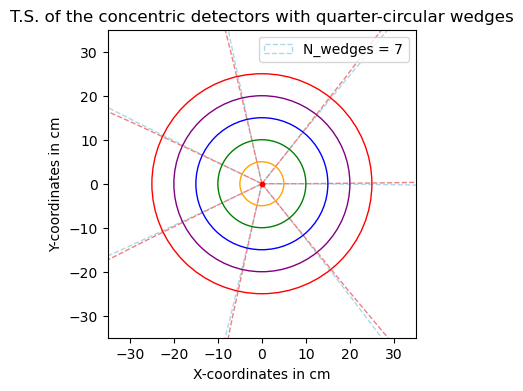

<Figure size 640x480 with 0 Axes>

In [40]:
# Define colors for arcs
colors = ['lightblue', 'lightcoral']

# Plot function for the quarter-circular wedge boundaries
plt.figure(figsize=(4, 4))

# Plotting varying circles
for i, center in enumerate(wedge_centers):
    if i % 2 == 0:
        # Clockwise arc
        angle = np.arctan2(center[1], center[0])
        theta1 = np.degrees(angle) + 90
        theta2 = theta1 + 90
    else:
        # Anti-Clockwise arc
        angle = np.arctan2(-center[1], -center[0])
        theta1 = np.degrees(angle)
        theta2 = theta1 + 90
    
    color = colors[i % 2]  # Alternate between lightblue and lightcoral
    
    arc = Arc(center, r*2, r*2, angle=0, theta1=theta1, theta2=theta2, color=color, linestyle='--', fill=False)
    plt.gca().add_patch(arc)

# Plotting additional detector circles with different colors
radii = [5, 10, 15, 20, 25]
colors = ['orange', 'green', 'blue', 'purple', 'red']
for radius, color in zip(radii, colors):
    circle = plt.Circle((0, 0), radius, color=color, linestyle='-', fill=False)
    plt.gca().add_patch(circle)

# Add labels and legend
plt.xlabel('X-coordinates in cm')
plt.ylabel('Y-coordinates in cm')
plt.title('T.S. of the concentric detectors with quarter-circular wedges')

# Set the axes limits
plt.xlim(-35, 35)
plt.ylim(-35, 35)

# Set aspect ratio to 1:1
plt.gca().set_aspect('equal')

# Plotting the origin (0, 0) point as a red dot
plt.scatter(0, 0, color='red', marker='o', s=10)

# Adding the legend
plt.legend([f'N_wedges = {N_wedges}'], loc="upper right")

# Show the plot
plt.show()

plt.savefig("Plot_2.png", dpi=500)

## Calculation of the fraction overlap of the detectors and the wedges

### Test for Fill

Hereafter, we change our definition of wedge such that the entire particle detector is covered. We define a wedge to be the area between the every 4th boundaries, i.e. area between 1st and 4th quarter circle, area between 2nd and 5th quarter circle and so on. To check that this ensures fill, we do the following fill test:

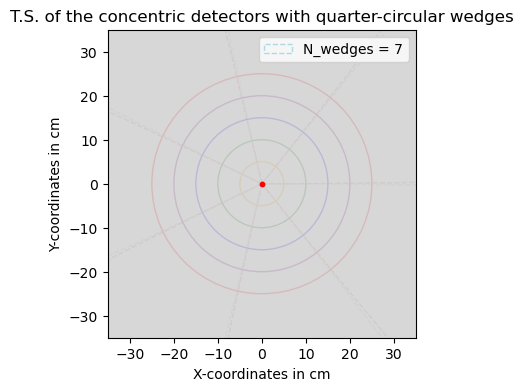

In [41]:
# Define colors for arcs
colors = ['lightblue', 'lightcoral']

# Plot function for the quarter-circular wedge boundaries
plt.figure(figsize=(4, 4))

# Plotting varying circles
for i, center in enumerate(wedge_centers):
    if i % 2 == 0:
        # Clockwise arc
        angle = np.arctan2(center[1], center[0])
        theta1 = np.degrees(angle) + 90
        theta2 = theta1 + 90
    else:
        # Anti-Clockwise arc
        angle = np.arctan2(-center[1], -center[0])
        theta1 = np.degrees(angle)
        theta2 = theta1 + 90
    
    color = colors[i % 2]  # Alternate between lightblue and lightcoral
    
    arc = Arc(center, r*2, r*2, angle=0, theta1=theta1, theta2=theta2, color=color, linestyle='--', fill=False)
    plt.gca().add_patch(arc)

# Plotting additional circles with different colors
radii = [5, 10, 15, 20, 25]
colors = ['orange', 'green', 'blue', 'purple', 'red']
for radius, color in zip(radii, colors):
    circle = plt.Circle((0, 0), radius, color=color, linestyle='-', fill=False)
    plt.gca().add_patch(circle)

# Fill the area between the quarter circle wedge boundaries
fill_color = 'lightgray'  # Choose a color for the fill
fill_alpha = 0.3  # Choose an alpha value for the fill
for i in range(len(wedge_centers) - 3):
    if i % 2 == 0:
        wedge_boundary_1 = wedge_centers[i]
        wedge_boundary_2 = wedge_centers[i + 3]
        angle_1 = np.arctan2(wedge_boundary_1[1], wedge_boundary_1[0])
        angle_2 = np.arctan2(wedge_boundary_2[1], wedge_boundary_2[0])
        theta1 = np.degrees(angle_1) + 90
        theta2 = np.degrees(angle_2)

        # Calculate the points along the inner and outer arcs
        inner_points = np.linspace(theta1, theta2, num=100)
        outer_points = np.linspace(theta1 + 90, theta2 + 90, num=100)

        # Convert polar coordinates to Cartesian coordinates
        inner_x = r * np.cos(np.radians(inner_points))
        inner_y = r * np.sin(np.radians(inner_points))
        outer_x = (r + r) * np.cos(np.radians(outer_points))
        outer_y = (r + r) * np.sin(np.radians(outer_points))

        # Plot the filled area with translucent color
        plt.fill_between(inner_x, inner_y, outer_x, outer_y, color=fill_color, alpha=fill_alpha)

# Add labels and legend
plt.xlabel('X-coordinates in cm')
plt.ylabel('Y-coordinates in cm')
plt.title('T.S. of the concentric detectors with quarter-circular wedges')

# Set the axes limits
plt.xlim(-35, 35)
plt.ylim(-35, 35)

# Set aspect ratio to 1:1
plt.gca().set_aspect('equal')

# Plotting the origin (0, 0) point as a red dot
plt.scatter(0, 0, color='red', marker='o', s=10)

# Adding the legend
plt.legend([f'N_wedges = {N_wedges}'], loc="upper right")

# Show the plot
plt.show()

# Wedge Objects, their definitions, and the overlapping fraction

## Definitions and Introduction

We have tested our wedge boundary generators and ensured that the wedges cover the entire detector cross-section. Now, we define `wedge_objects` as the list that contains the information of the start and end angles of a particular wedge over each detector layer. To find this, we find the intersection points of the wedge boundaries with the detector boundaries and then find the angle of each intersecting points and write the `Phi_start` and `Phi_end` span as the description for the wedge object.

### Finding and Printing 1st points of intersection

#### By Solving Quadratic Circle Equations

The direct method to do this is use SymPy and solve the quadratic circle equations for the first `wedge_centers` and the detector circles of respective radius. This code is super slow and I am trying to work on a non-quadratic method. (The code is commented below because it is slow and takes time when I restart kernel and run all cells. You can just remove comments by pressing `Ctrl + /` after highlighting the entire code and run it if needed.)

In [ ]:
# from sympy import symbols, Eq, solve

# # Define the symbols for the coordinates of the intersection points
# x, y = symbols('x y')

# # Define the center and radius of the second circle
# center2 = wedge_centers[0]
# radius2 = 1667

# # Loop through the radii of the first circles
# for radius1 in [5, 10, 15, 20, 25]:
#     # Define the center of the first circle
#     center1 = (0, 0)
    
#     # Define the equation for the first circle
#     eq1 = Eq((x - center1[0])**2 + (y - center1[1])**2, radius1**2)
    
#     # Define the equation for the second circle
#     eq2 = Eq((x - center2[0])**2 + (y - center2[1])**2, radius2**2)
    
#     # Solve the equations to find the intersection points
#     intersection_points = solve((eq1, eq2), (x, y))
    
#     print(f"Intersection points for circle with radius {radius1}:")
#     for point in intersection_points:
#         print(f"Intersection point: {point}")
#     print()

In [42]:
# # Storing the found intersection points
# import numpy as np

# # Define the coordinates
# coordinates = [(5.00000000000000, 0.0),
#                (9.99998875444174, -0.0149970343297709),
#                (14.9999325263849, -0.0449911535846610),
#                (19.9997975781303, -0.0899824083611567),
#                (24.9995501708405, -0.149970849257451)]

# # Convert the coordinates to a NumPy array
# intersection_points = np.array(coordinates)

# # Print the intersection points array
# print(intersection_points)

In [47]:
import numpy as np

intersection_points = []

# Calculate the vector from the origin to the first wedge center
first_center = np.array(wedge_centers[0])
vector = first_center - np.array([0, 0])

# Calculate the magnitude of the vector
magnitude = np.linalg.norm(vector)

# Calculate the unit vector
unit_vector = vector / magnitude

# Calculate the radial unit vector for the wedge quarter arc
r = 1667  # Radius of the wedge boundary quarter arc in cm
radial_unit_wedge = first_center - unit_vector * r

for radius in radii:
    # Calculate the radial unit vector for the detector circle
    radial_unit_detector = radius * unit_vector

    # Calculate the midpoint between the two vectors
    midpoint = (radial_unit_detector + radial_unit_wedge) / 2

    # Calculate the squared distance between the origin and the midpoint
    distance_midpoint_origin_squared = np.dot(midpoint, midpoint)

    # Calculate the squared height using the Pythagorean theorem if it is a valid value
    if radius ** 2 >= distance_midpoint_origin_squared:
        height_squared = radius ** 2 - distance_midpoint_origin_squared

        # Calculate the point on the perpendicular bisector at the given height
        perpendicular_vector = np.array([-unit_vector[1], unit_vector[0]])  # Fix: Change the sign of unit_vector[1]
        intersection_point = midpoint + np.sqrt(height_squared) * perpendicular_vector

        intersection_points.append(intersection_point)
    else:
        intersection_points.append(np.nan)

# Print the intersection points on the perpendicular bisector
for i, point in enumerate(intersection_points):
    print(f"The intersection point on detector layer {i + 1} for radius {radii[i]}: {point}")

The intersection point on detector layer 1 for radius 5: [ 4.3338714 -2.4935033]
The intersection point on detector layer 2 for radius 10: [ 8.6677428  -4.98700659]
The intersection point on detector layer 3 for radius 15: [13.0016142  -7.48050989]
The intersection point on detector layer 4 for radius 20: [17.3354856  -9.97401319]
The intersection point on detector layer 5 for radius 25: [ 21.669357   -12.46751648]


## Plotting the intersection points

We plot the intersection points found above.

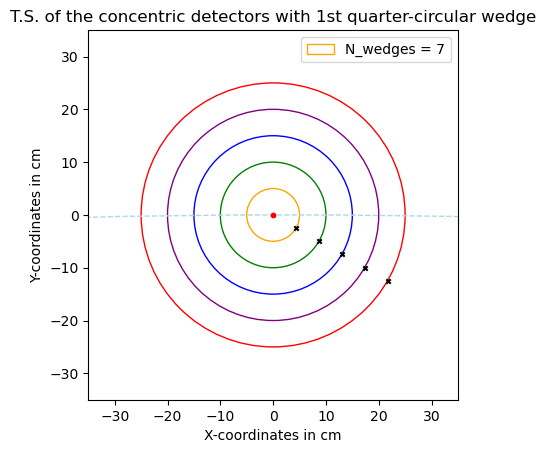

In [48]:
# Plot the concentric detector circles
for radius, color in zip(radii, colors):
    circle = plt.Circle((0, 0), radius, color=color, linestyle='-', fill=False)
    plt.gca().add_patch(circle)

# Plot the intersection points
for i, point in enumerate(intersection_points):
    plt.scatter(point[0], point[1], color='black', marker='x', s=10)

# Plotting the wedge circle
wedge_center = wedge_centers[0]
wedge_circle = plt.Circle(wedge_center, rParticleCurv, color='lightblue', linestyle='--', fill=False)

# Add the wedge circle to the axis
plt.gca().add_patch(wedge_circle)

# Add labels and legend
plt.xlabel('X-coordinates in cm')
plt.ylabel('Y-coordinates in cm')
plt.title('T.S. of the concentric detectors with 1st quarter-circular wedge')

# Set the axes limits
plt.xlim(-35, 35)
plt.ylim(-35, 35)

# Set aspect ratio to 1:1
plt.gca().set_aspect('equal')

# Plotting the origin (0, 0) point as a red dot
plt.scatter(0, 0, color='red', marker='o', s=10)

# Adding the legend
plt.legend([f'N_wedges = {N_wedges}'], loc="upper right")

# Show the plot
plt.show()

In [49]:
# Center and radius of the circle to check against
circle_center = wedge_centers[0]
circle_radius = rParticleCurv

for point,i in zip(intersection_points, range(5)):
    distance_to_center = np.linalg.norm(point - circle_center)
    print(f"Distance of intersection point {i+1} from the wedge quarter arc center: {distance_to_center}")
    
# Check the distance of each intersection point from the detector center (origin)
distances_from_center = []

for point in intersection_points:
    distance_to_center = np.linalg.norm(point)
    distances_from_center.append(distance_to_center)

# Print the distances
for i, distance in enumerate(distances_from_center):
    print(f"Distance of intersection point {i+1} from the detector center: {distance}")

Distance of intersection point 1 from the wedge quarter arc center: 1664.5056323124893
Distance of intersection point 2 from the wedge quarter arc center: 1662.0225630237396
Distance of intersection point 3 from the wedge quarter arc center: 1659.550842848751
Distance of intersection point 4 from the wedge quarter arc center: 1657.09052257262
Distance of intersection point 5 from the wedge quarter arc center: 1654.6416530475713
Distance of intersection point 1 from the detector center: 5.0
Distance of intersection point 2 from the detector center: 10.0
Distance of intersection point 3 from the detector center: 14.999999999999996
Distance of intersection point 4 from the detector center: 19.999999999999996
Distance of intersection point 5 from the detector center: 24.999999999999996


$\textbf{From the results above, we have verified our intersection point calculation, now we use symmetry to obtain all other intersection points and wedge boundaries.}$

## Finding other intersection points

After finding the first set of intersection points, we use Linear Algebra to reflect those points by using the formula:

$$ R(\vec{x}) = \text{proj}_{\vec{a}}\vec{x} - 2 \left(\text{proj}_{\vec{a}^\perp}\vec{x}\right) $$

This formula finds the reflection of $\vec{x}$ across $\vec{a}$.

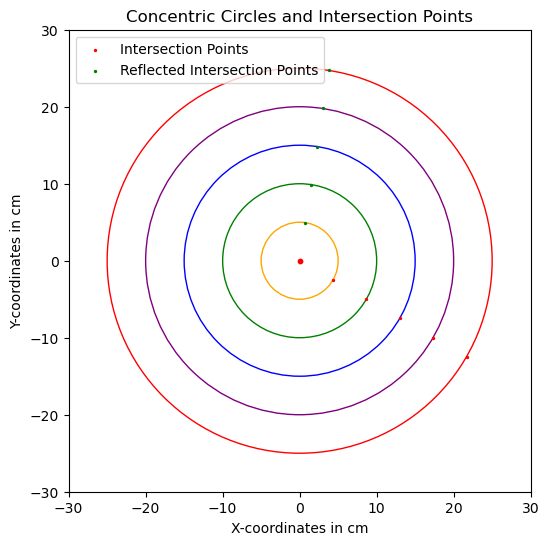

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# Convert circumferential points into NumPy array
circumferential_points = np.array(circumferential_points)

# Calculate the midpoint of circumferential_points[0] and circumferential_points[1]
midpoint = (circumferential_points[0] + circumferential_points[1]) / 2

# Calculate the direction vector of the line formed through the midpoint and the circumferential points
line_direction = (circumferential_points[1] - circumferential_points[0]) / np.linalg.norm(circumferential_points[1] - circumferential_points[0])

# Initialize an empty list to store the reflected intersection points
reflected_intersection_points = []

# Iterate over each intersection point
for point in intersection_points:
    # Calculate the vector from the midpoint to the current intersection point
    vector = point - midpoint
    
    # Calculate the dot product between the vector and line_direction
    dot_product = np.dot(vector, line_direction)
    
    # Reflect the vector across the line formed by the midpoint
    reflected_vector = vector - 2 * dot_product * line_direction
    
    # Calculate the reflected intersection point
    reflected_point = midpoint + reflected_vector
    
    # Add the reflected intersection point to the list
    reflected_intersection_points.append(reflected_point)

# Convert the list of reflected intersection points to a numpy array
reflected_intersection_points = np.array(reflected_intersection_points)

# Plotting the reflected intersection points (same as before)
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlim(-30, 30)
ax.set_ylim(-30, 30)

# Plot the concentric detector circles
for radius, color in zip(radii, colors):
    circle = plt.Circle((0, 0), radius, color=color, linestyle='-', fill=False)
    plt.gca().add_patch(circle)

# Convert intersection_points and reflected_intersection_points to numpy arrays and extract real components
intersection_points = np.array(intersection_points).real
reflected_intersection_points = np.array(reflected_intersection_points).real

# Plotting the original intersection points
ax.scatter(intersection_points[:, 0], intersection_points[:, 1], color='red', marker='o', label='Intersection Points', s=2)

# Plotting the reflected intersection points
ax.scatter(reflected_intersection_points[:, 0], reflected_intersection_points[:, 1], color='green', marker='o', label='Reflected Intersection Points', s=2)

# Plotting the origin (0, 0) point as a red dot
plt.scatter(0, 0, color='red', marker='o', s=10)

ax.set_aspect('equal')
ax.set_xlabel('X-coordinates in cm')
ax.set_ylabel('Y-coordinates in cm')
ax.set_title('Concentric Circles and Intersection Points')
ax.legend()

plt.show()

### Printing the Intersection Points

In [51]:
# Calculate the angles of the intersection points
Phi_start = np.arctan2(intersection_points[:, 1], intersection_points[:, 0])

# Calculate the angles of the reflected points
Phi_end = np.arctan2(reflected_intersection_points[:, 1], reflected_intersection_points[:, 0])

# Print the angles of the intersection points
print("Angles of the intersection points:")
print(Phi_start)

# Print the angles of the reflected points
print("Angles of the reflected points:")
print(Phi_end)

Angles of the intersection points:
[-0.52209907 -0.52209907 -0.52209907 -0.52209907 -0.52209907]
Angles of the reflected points:
[1.41969698 1.41969698 1.41969698 1.41969698 1.41969698]


### Define and Print the first wedge object

In [52]:
wedge_object = []

# Define the radius values and layer numbers
radii = [5, 10, 15, 20, 25]
layer_numbers = [1, 2, 3, 4, 5]

# Iterate over the radius and layer numbers
for radius, layer_number in zip(radii, layer_numbers):
    # Find the corresponding index in Phi_start and Phi_end arrays
    index = layer_numbers.index(layer_number)
    
    # Get the Phi_start and Phi_end values
    phi_start = Phi_start[index]
    phi_end = Phi_end[index]
    
    # Append the values to the wedge_object list
    wedge_object.append((layer_number, radius, phi_start, phi_end))

# Print the wedge_object list
print("Wedge object:")
print(wedge_object)

Wedge object:
[(1, 5, -0.5220990749761739, 1.4196969760018288), (2, 10, -0.5220990749761608, 1.4196969760018157), (3, 15, -0.5220990749761565, 1.4196969760018114), (4, 20, -0.5220990749761543, 1.4196969760018092), (5, 25, -0.5220990749761529, 1.4196969760018079)]


### Rotate the first wedge object using Rotational Symmetry to obtain all other wedges

Because our construction is totationally symmetrical, we can just rotate the obtained first `wedge_object` by `2*np.pi/N_wedges` to obtain the other `wedge_objects`.

In [53]:
import numpy as np

# Set the desired precision
precision = 10

# Initialize the wedge_objects list with the first wedge_object
wedge_objects = [wedge_object]

# Perform (N_wedges - 1) rotations
for _ in range(N_wedges - 1):
    rotated_wedge_objects = []

    # Rotate each wedge object in the wedge_objects list
    for i, wedge_object in enumerate(wedge_objects[-1]):
        layer_number, radius, phi_start, phi_end = wedge_object

        # Calculate the rotated angles
        rotation_angle = 2 * np.pi / N_wedges
        rotated_phi_start = phi_start + rotation_angle
        rotated_phi_end = phi_end + rotation_angle

        # Create the rotated wedge object and append it to the list
        rotated_wedge_object = (layer_number, radius, rotated_phi_start, rotated_phi_end)
        rotated_wedge_objects.append(rotated_wedge_object)

    # Append the rotated wedge_objects list to the wedge_objects list
    wedge_objects.append(rotated_wedge_objects)


# Print the wedge_objects list with higher precision
print("Wedge objects:")
for i, wedge_list in enumerate(wedge_objects):
    print(f"Wedge Object {i+1}:")
    for wedge_object in wedge_list:
        layer_number, radius, phi_start, phi_end = wedge_object
        print(f"Layer: {layer_number}, Radius: {format(radius, f'.{precision}f')}, Phi Start: {format(phi_start, f'.{precision}f')}, Phi End: {format(phi_end, f'.{precision}f')}")
    print()

Wedge objects:
Wedge Object 1:
Layer: 1, Radius: 5.0000000000, Phi Start: -0.5220990750, Phi End: 1.4196969760
Layer: 2, Radius: 10.0000000000, Phi Start: -0.5220990750, Phi End: 1.4196969760
Layer: 3, Radius: 15.0000000000, Phi Start: -0.5220990750, Phi End: 1.4196969760
Layer: 4, Radius: 20.0000000000, Phi Start: -0.5220990750, Phi End: 1.4196969760
Layer: 5, Radius: 25.0000000000, Phi Start: -0.5220990750, Phi End: 1.4196969760

Wedge Object 2:
Layer: 1, Radius: 5.0000000000, Phi Start: 0.3754988260, Phi End: 2.3172948770
Layer: 2, Radius: 10.0000000000, Phi Start: 0.3754988260, Phi End: 2.3172948770
Layer: 3, Radius: 15.0000000000, Phi Start: 0.3754988260, Phi End: 2.3172948770
Layer: 4, Radius: 20.0000000000, Phi Start: 0.3754988260, Phi End: 2.3172948770
Layer: 5, Radius: 25.0000000000, Phi Start: 0.3754988260, Phi End: 2.3172948770

Wedge Object 3:
Layer: 1, Radius: 5.0000000000, Phi Start: 1.2730967271, Phi End: 3.2148927781
Layer: 2, Radius: 10.0000000000, Phi Start: 1.2730967

### Save wedge_objects as a .txt file

In [54]:
# Write wedge_objects to a .txt file
filename = "wedge_objects.txt"
with open(filename, "w") as file:
    for i, wedge_list in enumerate(wedge_objects):
        for j, wedge_object in enumerate(wedge_list):
            layer_number, radius, phi_start, phi_end = wedge_object
            file.write(f"({layer_number},{radius},{phi_start},{phi_end}),")
        file.write("\n")

### Plot all wedge_objects

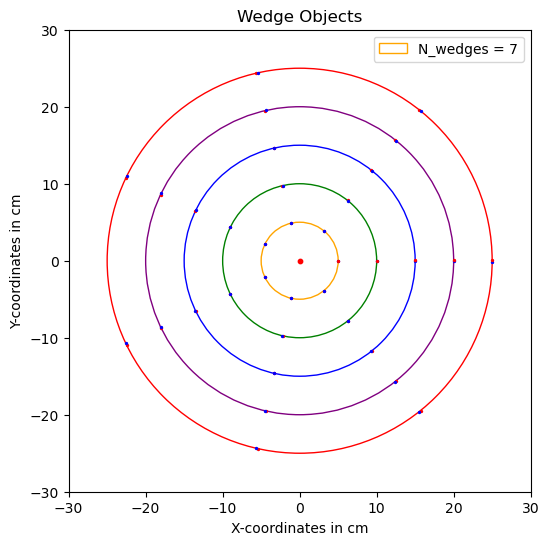

In [ ]:
def plot_wedge_objects(wedge_objects):
    # Create a figure and axes for the plot
    fig, ax = plt.subplots(figsize=(6, 6))
    
    # Set the limits of the plot
    ax.set_xlim(-30, 30)
    ax.set_ylim(-30, 30)
    
    # Plot the concentric detector circles
    for radius, color in zip(radii, colors):
        circle = plt.Circle((0, 0), radius, color=color, linestyle='-', fill=False)
        plt.gca().add_patch(circle)
    
    # Iterate over each rotation of the wedge objects
    for i, wedge_list in enumerate(wedge_objects):
        # Iterate over each wedge object
        for wedge_object in wedge_list:
            layer_number, radius, phi_start, phi_end = wedge_object
            
            # Calculate the start and end angles in degrees
            start_angle_deg = np.degrees(phi_start)
            end_angle_deg = np.degrees(phi_end)
            
            # Plot the start and end angles in a scatter plot
            ax.scatter([0, radius * np.cos(phi_start)], [0, radius * np.sin(phi_start)], color='blue', s = 2)
            ax.scatter([0, radius * np.cos(phi_end)], [0, radius * np.sin(phi_end)], color='red', s = 2)
    
    # Plot the origin (0, 0) point as a red dot
    plt.scatter(0, 0, color='red', marker='o', s=10)
    
    ax.set_aspect('equal')
    ax.set_xlabel('X-coordinates in cm')
    ax.set_ylabel('Y-coordinates in cm')
    ax.set_title('Wedge Objects')
    
    # Adding the legend
    plt.legend([f'N_wedges = {N_wedges}'], loc="upper right")

    plt.show()

# Assuming wedge_objects is already defined
plot_wedge_objects(wedge_objects)


## Overlapping Fraction Calculation

This code is to calculate what fraction of the circumference of each detector layer overlaps with the `wedge_objects`. We just find the angle of overlap and divide it by 360 degrees to obtain the `overlap_percentage`.

In [55]:
import numpy as np
import pandas as pd

def find_overlap(wedge_objects):
    overlaps = []

    for i in range(N_wedges-1):
        current_wedge = wedge_objects[i]
        next_wedge = wedge_objects[(i + 1) % N_wedges]

        current_angles = np.array([(wedge[2], wedge[3]) for wedge in current_wedge])
        next_angles = np.array([(wedge[2], wedge[3]) for wedge in next_wedge])

        overlap_angles = current_angles[:, 1] - next_angles[:, 0]

        for j, radius in enumerate(current_wedge):
            overlap_percentage = overlap_angles[j] / (2 * np.pi) * 100
            overlap_percentage = np.clip(overlap_percentage, 0, 100)  # Clip the values to ensure they are within 0-100 range
            overlaps.append((i, (i + 1) % N_wedges, radius[1], overlap_percentage))

    return overlaps

# Assuming wedge_objects is already defined
overlap_percentages = find_overlap(wedge_objects)

# Convert the list of tuples to a pandas DataFrame
df = pd.DataFrame(overlap_percentages, columns=['Start Wedge Object', 'End Wedge Object', 'Layer', 'Overlap Percentage'])

# Print the DataFrame
print(df)


    Start Wedge Object  End Wedge Object  Layer  Overlap Percentage
0                    0                 1      5            16.61893
1                    0                 1     10            16.61893
2                    0                 1     15            16.61893
3                    0                 1     20            16.61893
4                    0                 1     25            16.61893
5                    1                 2      5            16.61893
6                    1                 2     10            16.61893
7                    1                 2     15            16.61893
8                    1                 2     20            16.61893
9                    1                 2     25            16.61893
10                   2                 3      5            16.61893
11                   2                 3     10            16.61893
12                   2                 3     15            16.61893
13                   2                 3     20 

In [56]:
import numpy as np
import pandas as pd

def find_overlap(wedge_objects):
    overlaps = []

    for i in range(1):
        current_wedge = wedge_objects[i]
        next_wedge = wedge_objects[(i + 1) % N_wedges]

        current_angles = np.array([(wedge[2], wedge[3]) for wedge in current_wedge])
        next_angles = np.array([(wedge[2], wedge[3]) for wedge in next_wedge])

        overlap_angles = current_angles[:, 1] - next_angles[:, 0]
        total_overlap_angles = overlap_angles * N_wedges

        for j, radius in enumerate(current_wedge):
            total_overlap_percentage = total_overlap_angles[j] / (2 * np.pi) * 100
            total_overlap_percentage = np.clip(total_overlap_percentage, 0, 100)  # Clip the values to ensure they are within 0-100 range
            overlaps.append((radius[1], total_overlap_percentage))

    return overlaps

# Assuming wedge_objects and N_wedges are already defined
overlap_percentages = find_overlap(wedge_objects)

# Convert the list of tuples to a pandas DataFrame
df = pd.DataFrame(overlap_percentages, columns=['Detector Radius', 'Total Overlap Percentage'])

# Print the DataFrame
print(df)

   Detector Radius  Total Overlap Percentage
0                5                     100.0
1               10                     100.0
2               15                     100.0
3               20                     100.0
4               25                     100.0
